# <center>CREADO POR JORGE CARDONA</center>

In [1]:
# configura el notebook para que las celdas tomen todo el ancho de la pantalla
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importa las librerias para los ejemplos

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# importo bibliotecas para graficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [4]:
def graficar_datos_resumen(modelo, x_entramiento, prediccion, x_testeo, y_train, y_test, precision, clasificador):

    aciertos = 0
    
    # define las dimensiones con que se van a realizar los graficos
    altura_grafica = 9
    largo_grafica  = 32
    
    # define el tamaño de la grafica 
    plt.rcParams['figure.figsize'] = (largo_grafica, altura_grafica)
    
    # ubica la legenda que los marcadores en la posicion (0,0) del plano
    plt.rcParams["legend.handlelength"] = 0

    plt.style.use('ggplot')
    
    cantidad_de_validaciones = 10 
    # declara que se va a realizar en una fila 3 graficas
    fig, ax =plt.subplots(1,3)

    # configura el titulo superior de todas las graficas
    fig.suptitle('RESUMEN DEL CLASIFICADOR ' + clasificador ,fontsize=40)
        
    valores_cross_validation = cross_val_score(modelo, x_entramiento, y_train ,cv=cantidad_de_validaciones)

    # obtiene los valores de la validacion cruzada
    promedio_validacion_cruzada = round(np.mean(valores_cross_validation) * 100, precision)
    variacion_validacion_cruzada = round(np.std(valores_cross_validation) * 100, precision)
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(list(y_test), list(prediccion))
    area_bajo_la_curva           = round(metrics.auc(false_positive_rate, true_positive_rate) * 100, precision)
    valor_roc_area_bajo_la_curva = round(metrics.roc_auc_score(list(y_test), list(prediccion)) * 100, precision)
    
    # genera la matriz de confusion y muestra un grafico de esta con el dataset evaluado    
    conf_matrix = metrics.confusion_matrix(list(y_test), list(prediccion))

    # convierte los valores de la matriz a lista
    valores_matriz_confusion = conf_matrix.tolist()

    # guarda en una lista los valores que acertaron y los que no acertaron
    valores_aciertos = []
    valores_fallos   = []  
        
    
    for i in range (len(prediccion)):
        if prediccion[i]==y_test[i]:
            aciertos += 1
            
    # recorre las filas de la matriz para extraer los valores que existen y sumarlos segun sea el caso
    for i in range(len(valores_matriz_confusion)):

        # gaurda el tamaño de la fila del vector
        x  = len(valores_matriz_confusion[i])

        # guarda lso valores de las columnas
        valores_fallos_suma   = 0

        for j in range(x):

            # verifica que los indices son iguales, entonces es la diagonal de la matriz
            # entonces son los de las claes
            if(i==j):
                # guarda en una lista los valores de los valores que son exitosos, que son los qeu concuerdan con la diagonal de la matriz
                # estos son los aciertos de esta clase
                valores_aciertos.append(valores_matriz_confusion[i][j])

            else:
                # guarda la suma de las columnas excepto el valor de la diagonal de la matriz
                # estos son los fallos de esta clase
                valores_fallos_suma += (valores_matriz_confusion[i][j])

        # guarda los valores de las uma de las filas del vector el el cual el indice no es el de la diagonal de la matriz
        valores_fallos.append(valores_fallos_suma)

    # ordena los valores de la matriz para ver aciertos en un eje y fallos en otro eje 
    # convierte la lista a matrizpara usarla en la grafica
    aciertos_fallos = np.array([valores_aciertos, valores_fallos])

    # crea un  nuevo mapa de calor ordenado por ejes, mostrando aciertos en un mismo lado y fallos en el otro eje
    LABELS_ACIERTO_FALLOS = ['ACIERTOS','FALLOS']
    LABELS = ['ACIERTOS','FALLOS']
    LABELS_X = ['EN DISPUTA','SIN DISPUTA']
    
    plt.figure(figsize=(4, 4))    
    ax[0].title.set_text("Cantidad de Aciertos-Fallos")
    sns.heatmap(aciertos_fallos, xticklabels=LABELS_X, yticklabels=LABELS_ACIERTO_FALLOS, annot=True, fmt="d", ax=ax[0])

    ### genera el grafico de la curva roc del modelo evaluado con el clasificador actual
    # tamaño de la linea del grafico
    lw = 2 

    ax[1].title.set_text('Comportamiento bajo el criterio de la curva ROC')
    # muestra una linea punteada desde la posicion (0,0) hasta la posicion (1,1), para verificar con la curva dibujada
    ax[1].plot(false_positive_rate, true_positive_rate, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % area_bajo_la_curva)
    ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[1].legend(loc="lower right")
    ax[1].set_xlabel('Falsos Positivos Rate')
    ax[1].set_ylabel('Verdaderos Positivos Rate')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xticks(false_positive_rate)
    ax[1].set_xticklabels(list(map(str,false_positive_rate)))

    # genera el grafico de la matriz de confusion
    plt.figure(figsize=(4, 4))    
    ax[2].title.set_text("Matriz de Confusion")
    sns.heatmap(conf_matrix, xticklabels=LABELS_X, yticklabels=LABELS_X, annot=True, fmt="d", ax=ax[2])

    # muestra todas las graficas
    plt.show()
    
    # Verifica que tan bueno es el clasificador, con las veces que clasifico correctamente
    print("Accuracy: ", round(metrics.accuracy_score(list(y_test), list(prediccion)) * 100 ,precision) ,"%")

    # Muestra Qué porcentaje de tuplas positivas se etiquetan como tales
    print("Precision: ", round(metrics.precision_score(list(y_test), list(prediccion)) * 100 ,precision) ,"%")

    # Muestra Qué porcentaje de tuplas positivas se etiquetan como tales
    print("Recall: ", round(metrics.recall_score(list(y_test), list(prediccion)) * 100 ,precision) ,"%")

    # Muestra Qué porcentaje de tuplas positivas se etiquetan como tales
    print("F1-Score: ", round(metrics.f1_score(list(y_test), list(prediccion)) * 100 ,precision) ,"%")

    # Muestra el area bajo la curva
    print("Area Bajo la curva: ", area_bajo_la_curva ,"%")        

    # Mestra el promedio de la validacion cruzada
    print("El promedio de Cross Validation para ", cantidad_de_validaciones, " validaciones es: ", promedio_validacion_cruzada, "% con una variabilidad de +/- ", variacion_validacion_cruzada ,"%") 

In [5]:
def entrenamiento_modelo (x_entramiento, x_testeo, y_train, y_test):
    
    precision = 2
    y_test = np.asarray(y_test)
    
    modelo = MultinomialNB()       
    modelo     = modelo.fit(x_entramiento,y_train)
    prediccion = modelo.predict(x_testeo)
    prediccion = np.asarray(prediccion)    
    graficar_datos_resumen(modelo, x_entramiento, prediccion, x_testeo, y_train, y_test, precision, 'MultinomialNB')
        
    modelo     = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
    modelo     = modelo.fit(x_entramiento,y_train)
    prediccion = modelo.predict(x_testeo)
    prediccion = np.asarray(prediccion)    
    graficar_datos_resumen(modelo, x_entramiento, prediccion, x_testeo, y_train, y_test, precision, 'GradientBoostingClassifier')   

    modelo     = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    modelo     = modelo.fit(x_entramiento,y_train)
    prediccion = modelo.predict(x_testeo)
    prediccion = np.asarray(prediccion)    
    graficar_datos_resumen(modelo, x_entramiento, prediccion, x_testeo, y_train, y_test, precision, 'RandomForestClassifier') 
    
    modelo     = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
    modelo     = modelo.fit(x_entramiento,y_train)
    prediccion = modelo.predict(x_testeo)
    prediccion = np.asarray(prediccion)    
    graficar_datos_resumen(modelo, x_entramiento, prediccion, x_testeo, y_train, y_test, precision, 'LogisticRegression')

# carga los dataset

# <center> EJEMPLO CLASIFICADOR DE DISPUTA LEGAL </center>

In [6]:
data_consumer = pd.read_excel('Data Consumer Example.xlsx')

In [7]:
data_consumer.head()

,docid,dispute,complaint
0,1,0,homeownership advisor submitted sls received ...
1,2,0,file complaint foreclosing wrongly familys ho...
2,3,0,live mortgage holder bankrupt sold loan green...
3,4,0,wife fha backed yr serviced signed filed chap...
4,5,0,review lender months modification requesting ...


In [8]:
len(data_consumer)

10000

In [9]:
len(data_consumer[data_consumer.dispute==0])

5018

In [10]:
len(data_consumer[data_consumer.dispute==1])

4982

In [11]:
x = data_consumer["complaint"]
y = data_consumer["dispute"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# transforma los datos a enteros
y_train=y_train.astype('int')

In [13]:
x_train.head()

4983     loan modification health problems changed loa...
6789     applied refinance heloc existing mortgage com...
2221     mortgage transferred home loans aware til tra...
6043     home equity line credit account years retirin...
1564     home owners insurance made monthly payment fi...
Name: complaint, dtype: object

## <center> USO CountVectorizer </center>

In [14]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(x_train)
x_testcv  = cv.transform(x_test)

## <center> RESULTADO CountVectorizer </center>

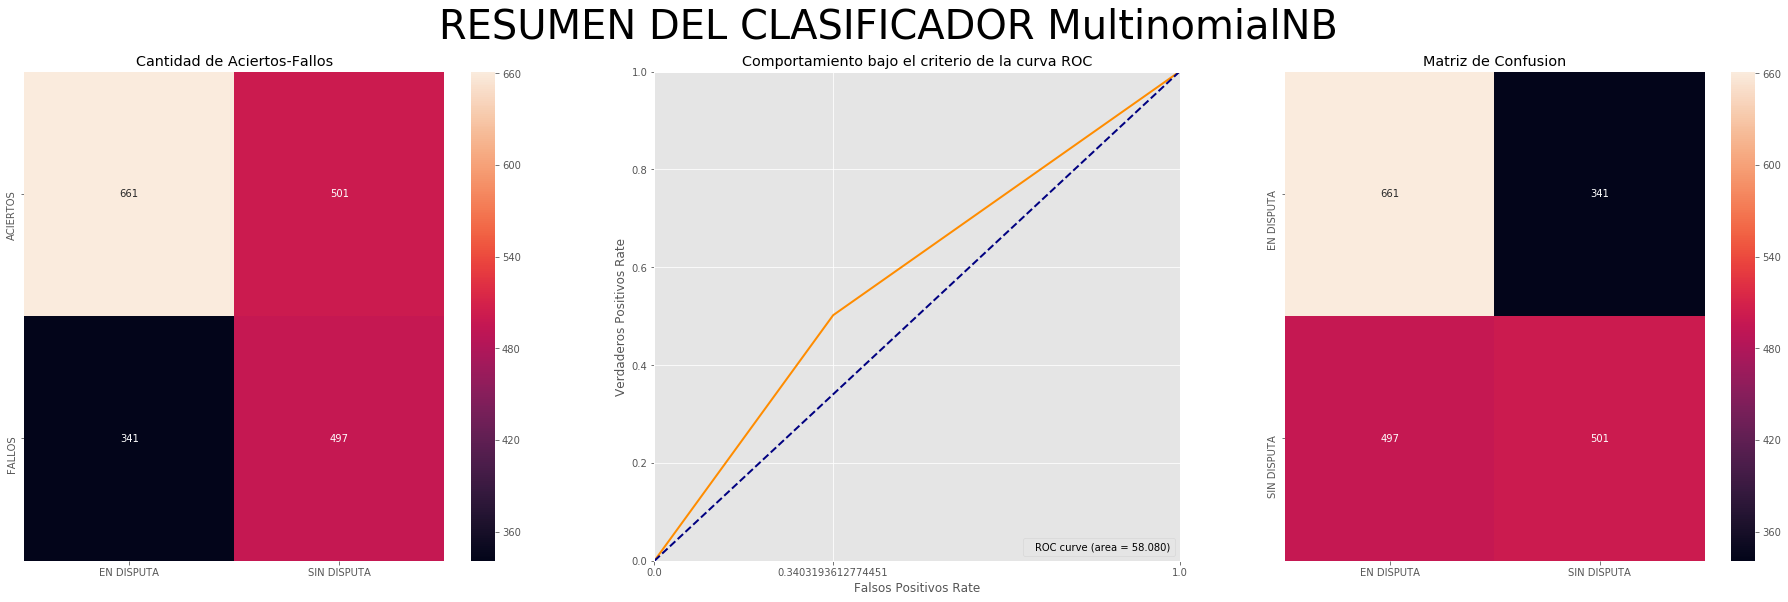

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  58.1 %
Precision:  59.5 %
Recall:  50.2 %
F1-Score:  54.46 %
Area Bajo la curva:  58.08 %
El promedio de Cross Validation para  10  validaciones es:  57.51 % con una variabilidad de +/-  0.92 %


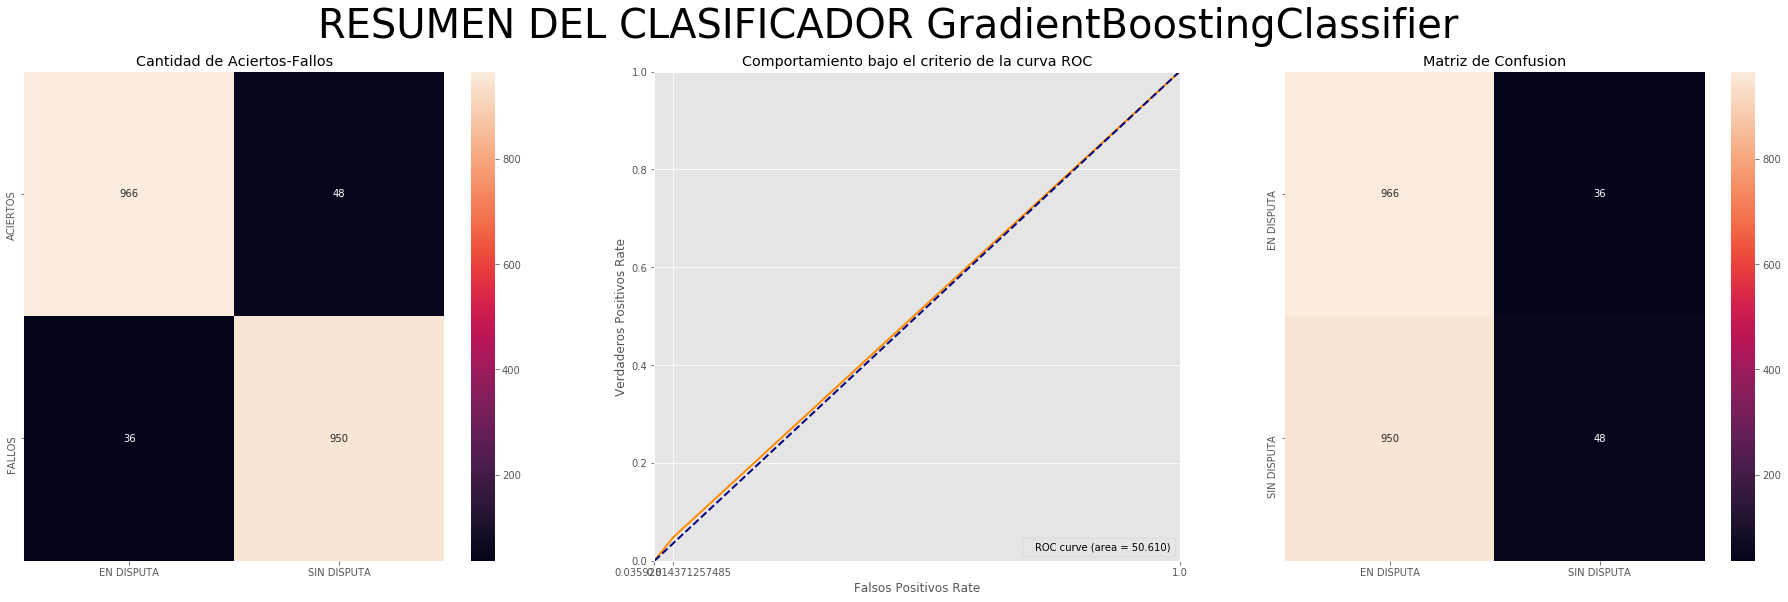

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  50.7 %
Precision:  57.14 %
Recall:  4.81 %
F1-Score:  8.87 %
Area Bajo la curva:  50.61 %
El promedio de Cross Validation para  10  validaciones es:  50.61 % con una variabilidad de +/-  0.5 %


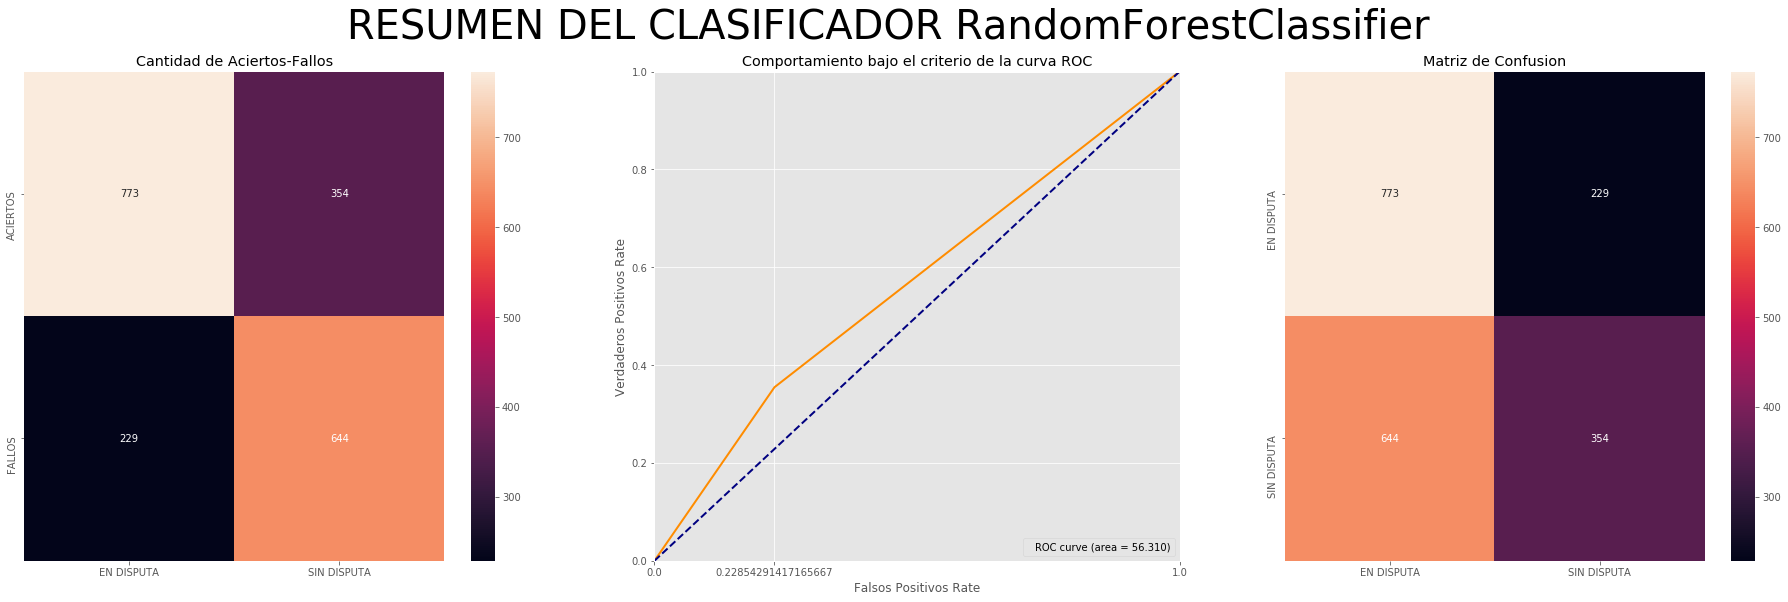

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  56.35 %
Precision:  60.72 %
Recall:  35.47 %
F1-Score:  44.78 %
Area Bajo la curva:  56.31 %
El promedio de Cross Validation para  10  validaciones es:  56.75 % con una variabilidad de +/-  1.08 %


C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

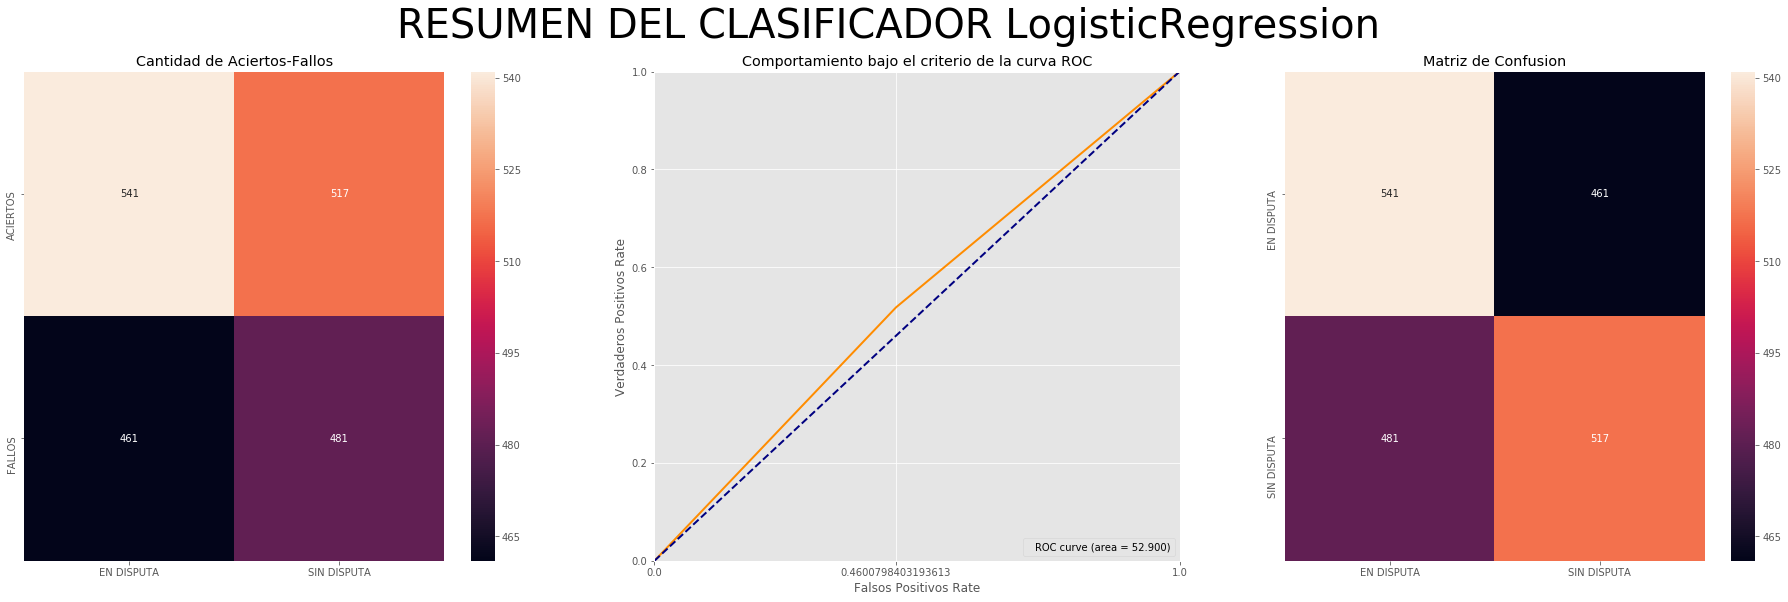

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  52.9 %
Precision:  52.86 %
Recall:  51.8 %
F1-Score:  52.33 %
Area Bajo la curva:  52.9 %
El promedio de Cross Validation para  10  validaciones es:  54.64 % con una variabilidad de +/-  1.96 %


In [15]:
entrenamiento_modelo (x_traincv, x_testcv, y_train, y_test)

## <center> USO TfidfVectorizer </center>
### term frequency–inverse document frequency

In [16]:
Tfid = TfidfVectorizer(min_df=1,stop_words='english')
x_trainTfid = Tfid.fit_transform(x_train)
x_testTfid  = Tfid.transform(x_test)

## <center> RESULTADO TfidfVectorizer </center>

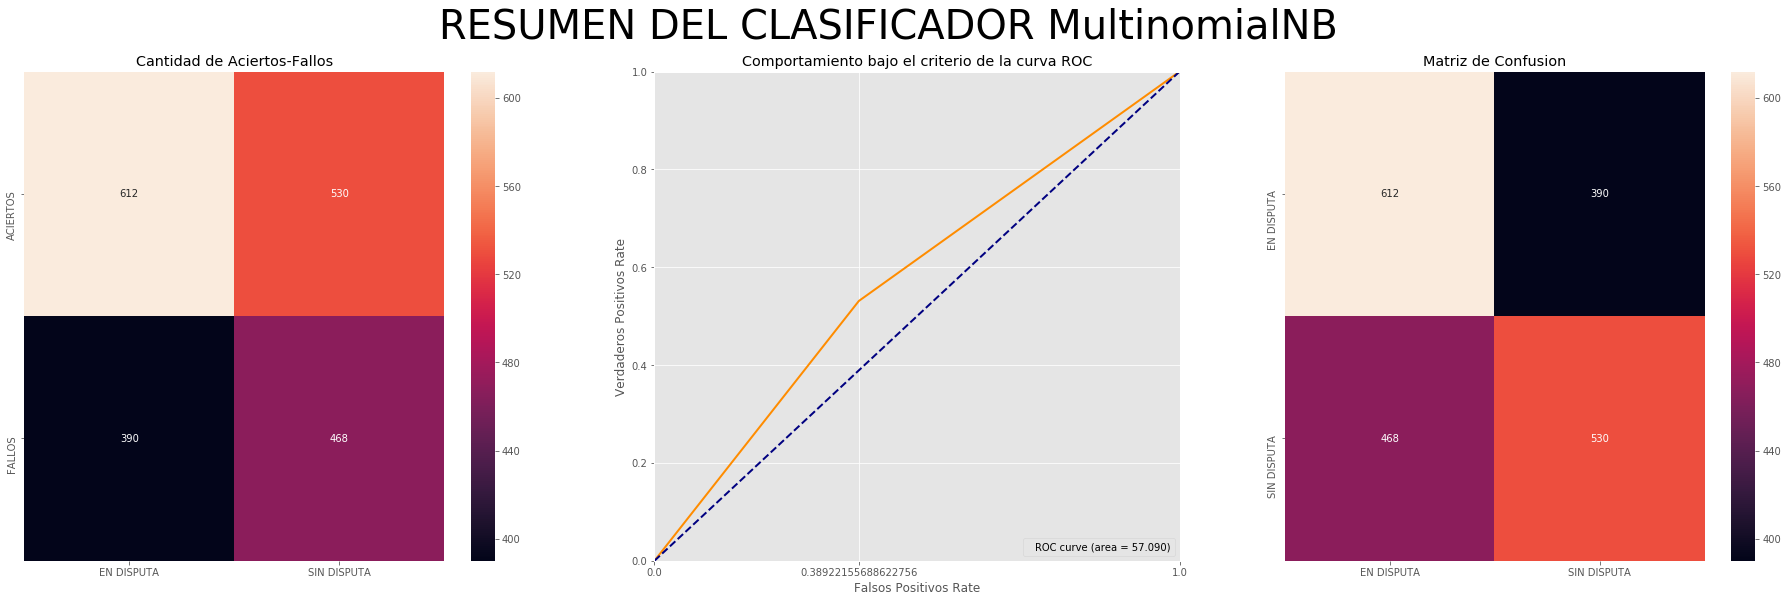

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  57.1 %
Precision:  57.61 %
Recall:  53.11 %
F1-Score:  55.27 %
Area Bajo la curva:  57.09 %
El promedio de Cross Validation para  10  validaciones es:  57.39 % con una variabilidad de +/-  1.18 %


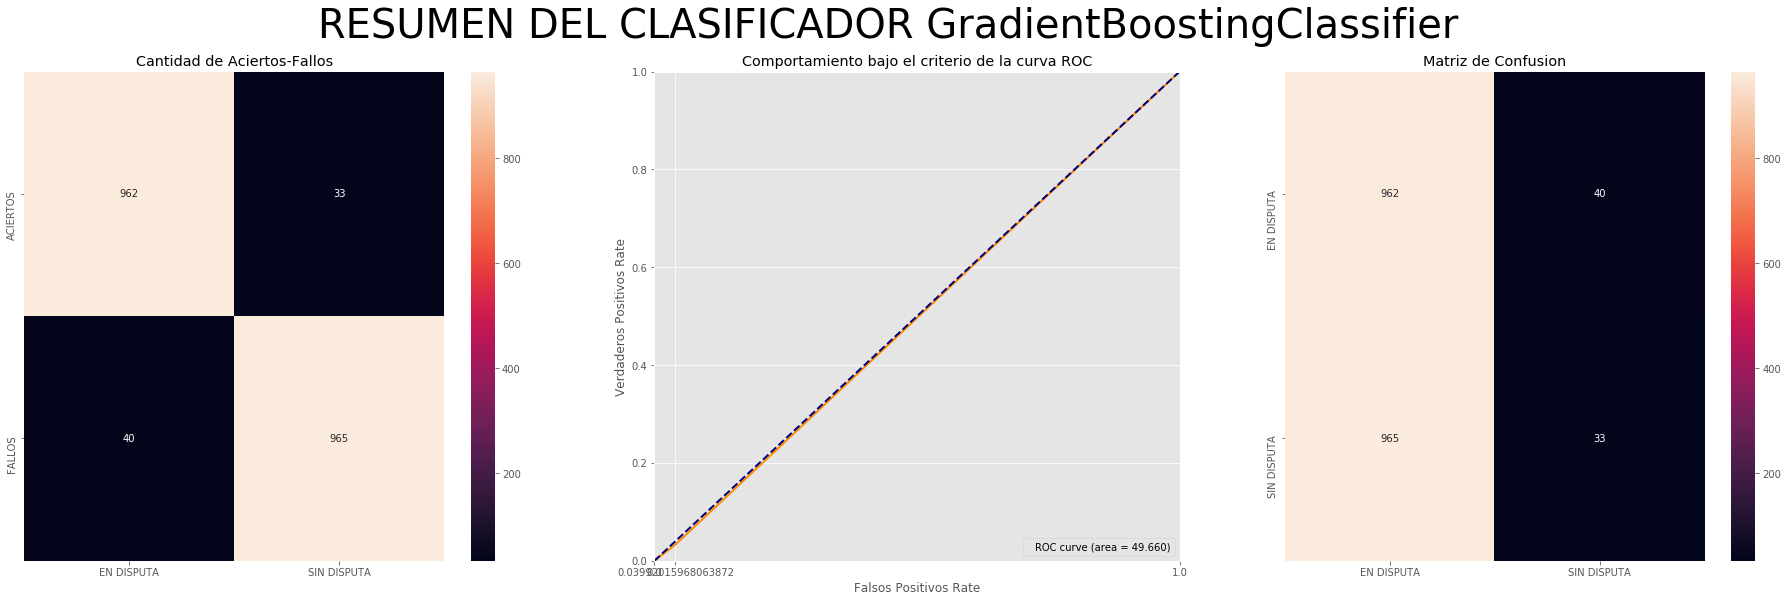

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  49.75 %
Precision:  45.21 %
Recall:  3.31 %
F1-Score:  6.16 %
Area Bajo la curva:  49.66 %
El promedio de Cross Validation para  10  validaciones es:  50.92 % con una variabilidad de +/-  0.33 %


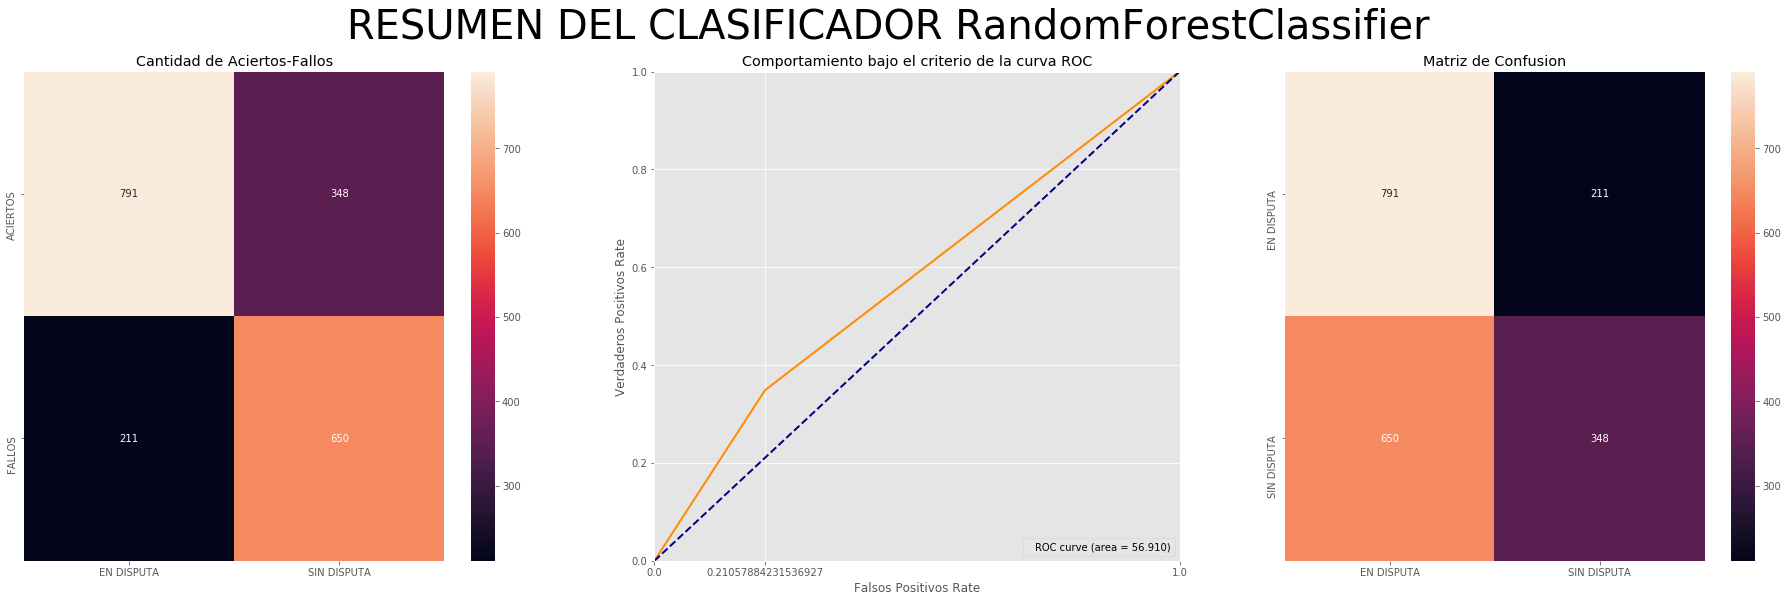

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  56.95 %
Precision:  62.25 %
Recall:  34.87 %
F1-Score:  44.7 %
Area Bajo la curva:  56.91 %
El promedio de Cross Validation para  10  validaciones es:  56.9 % con una variabilidad de +/-  1.81 %


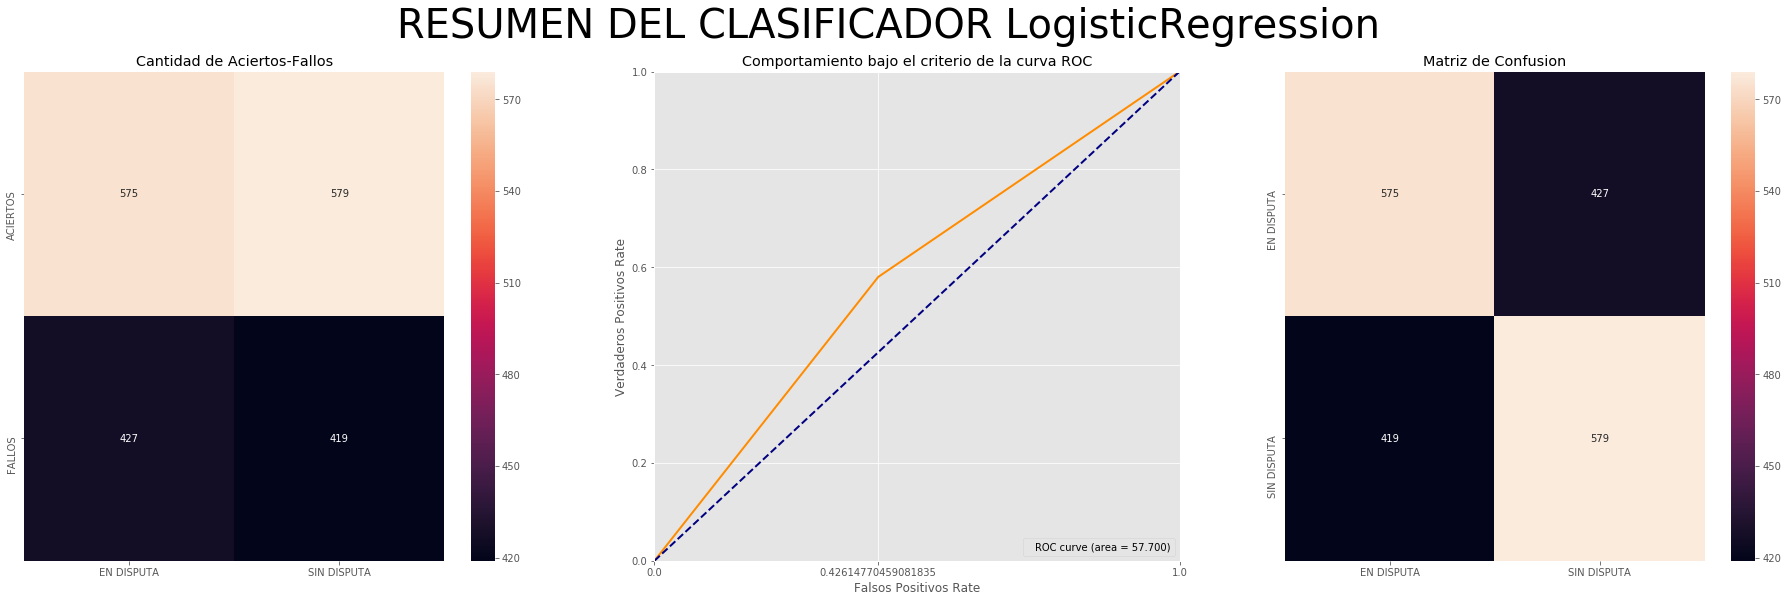

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  57.7 %
Precision:  57.55 %
Recall:  58.02 %
F1-Score:  57.78 %
Area Bajo la curva:  57.7 %
El promedio de Cross Validation para  10  validaciones es:  56.51 % con una variabilidad de +/-  1.63 %


In [17]:
entrenamiento_modelo (x_trainTfid, x_testTfid, y_train, y_test)

# <center> EJEMPLO CLASIFICACION DE SPAM </center>

In [18]:
SpamCollection = pd.read_csv('SMSSpamCollection',sep='\t',names=['Status','Message'])

print("muestra",len(SpamCollection))
print("spam", len(SpamCollection[SpamCollection.Status == 'spam']))
print("ham",  len(SpamCollection[SpamCollection.Status == 'ham']))

SpamCollection.head()

muestra 5572
spam 747
ham 4825


,Status,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
SpamCollection.loc[SpamCollection["Status"]=='spam',"Status",] = 1
SpamCollection.loc[SpamCollection["Status"]=='ham',"Status",]  = 0

In [20]:
SpamCollection.head()

,Status,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
x = SpamCollection["Message"]
y = SpamCollection["Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# transforma los datos a enteros
y_train=y_train.astype('int')

## <center> USO CountVectorizer </center>

In [22]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(x_train)
x_testcv  = cv.transform(x_test)

## <center> RESULTADO CountVectorizer </center>

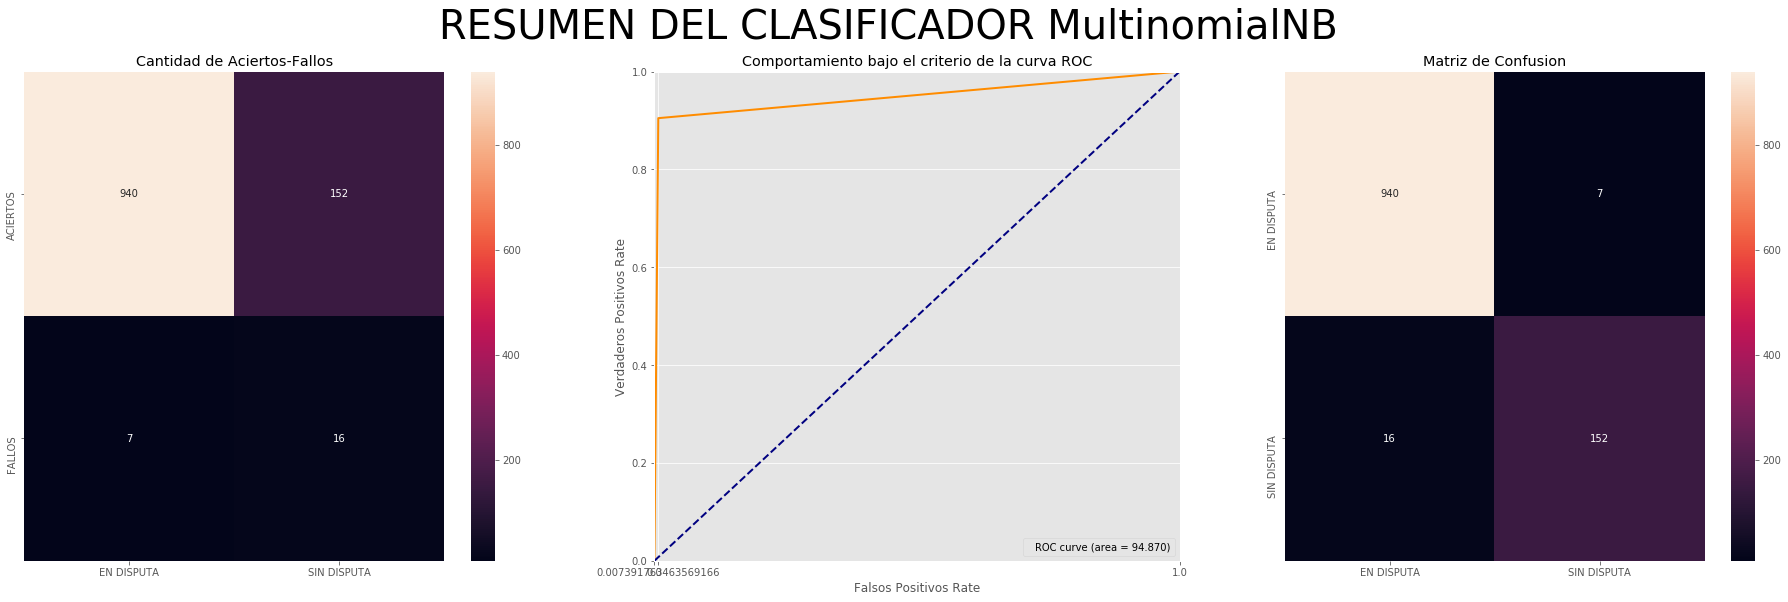

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  97.94 %
Precision:  95.6 %
Recall:  90.48 %
F1-Score:  92.97 %
Area Bajo la curva:  94.87 %
El promedio de Cross Validation para  10  validaciones es:  98.12 % con una variabilidad de +/-  0.5 %


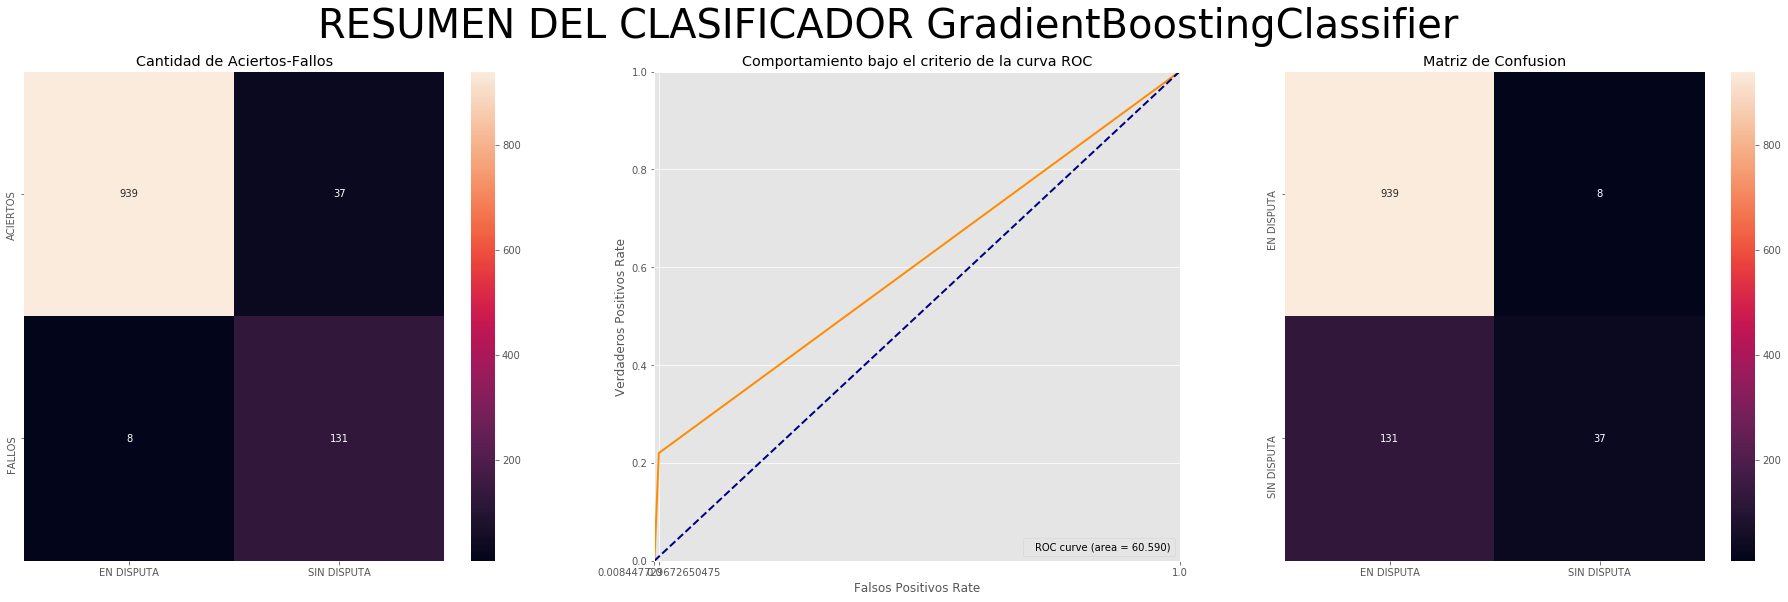

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  87.53 %
Precision:  82.22 %
Recall:  22.02 %
F1-Score:  34.74 %
Area Bajo la curva:  60.59 %
El promedio de Cross Validation para  10  validaciones es:  89.1 % con una variabilidad de +/-  0.54 %


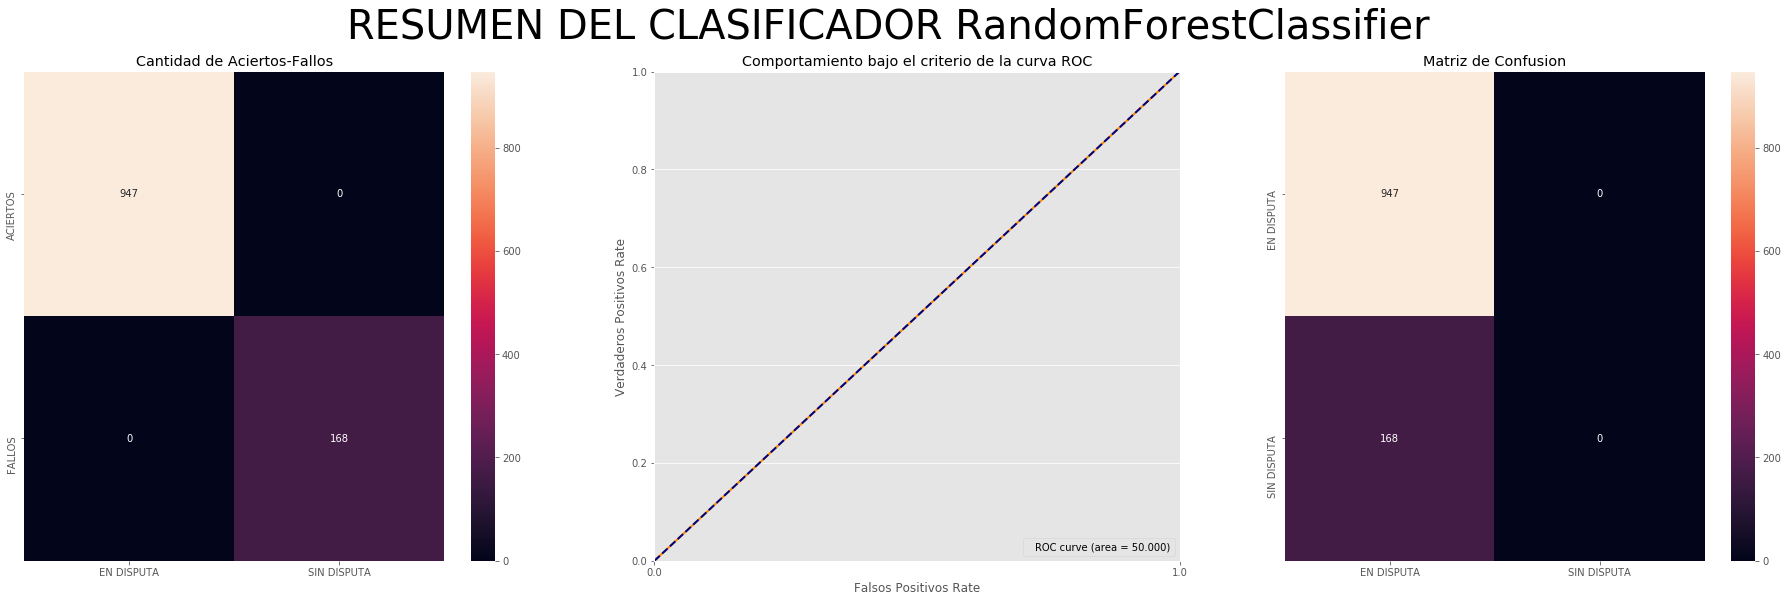

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  84.93 %
Precision:  0.0 %
Recall:  0.0 %
F1-Score:  0.0 %
Area Bajo la curva:  50.0 %
El promedio de Cross Validation para  10  validaciones es:  87.01 % con una variabilidad de +/-  0.05 %


C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


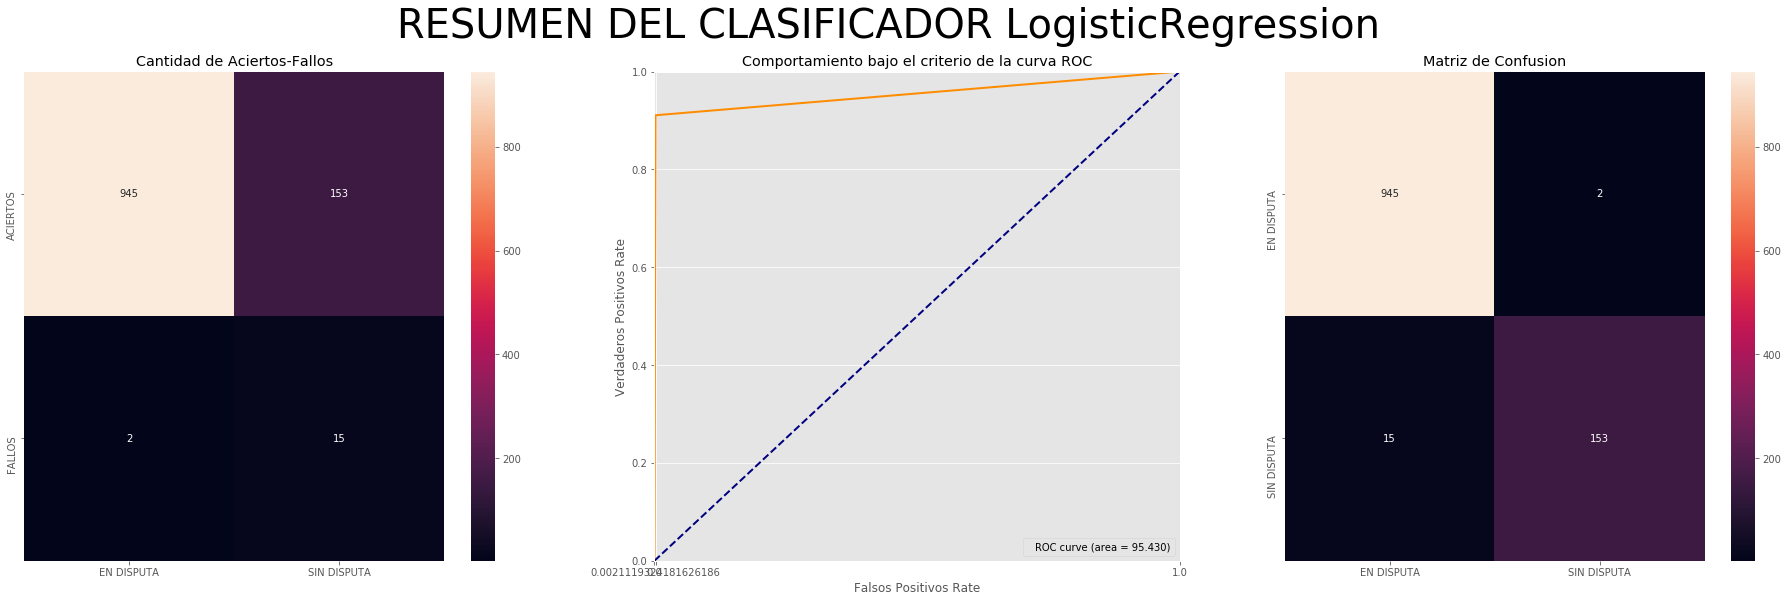

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  98.48 %
Precision:  98.71 %
Recall:  91.07 %
F1-Score:  94.74 %
Area Bajo la curva:  95.43 %
El promedio de Cross Validation para  10  validaciones es:  98.0 % con una variabilidad de +/-  0.46 %


In [23]:
entrenamiento_modelo (x_traincv, x_testcv, y_train, y_test)

## <center> USO TfidfVectorizer </center>
### term frequency–inverse document frequency

In [24]:
Tfid = TfidfVectorizer(min_df=1,stop_words='english')
x_trainTfid = Tfid.fit_transform(x_train)
x_testTfid  = Tfid.transform(x_test)

## <center> RESULTADO TfidfVectorizer </center>

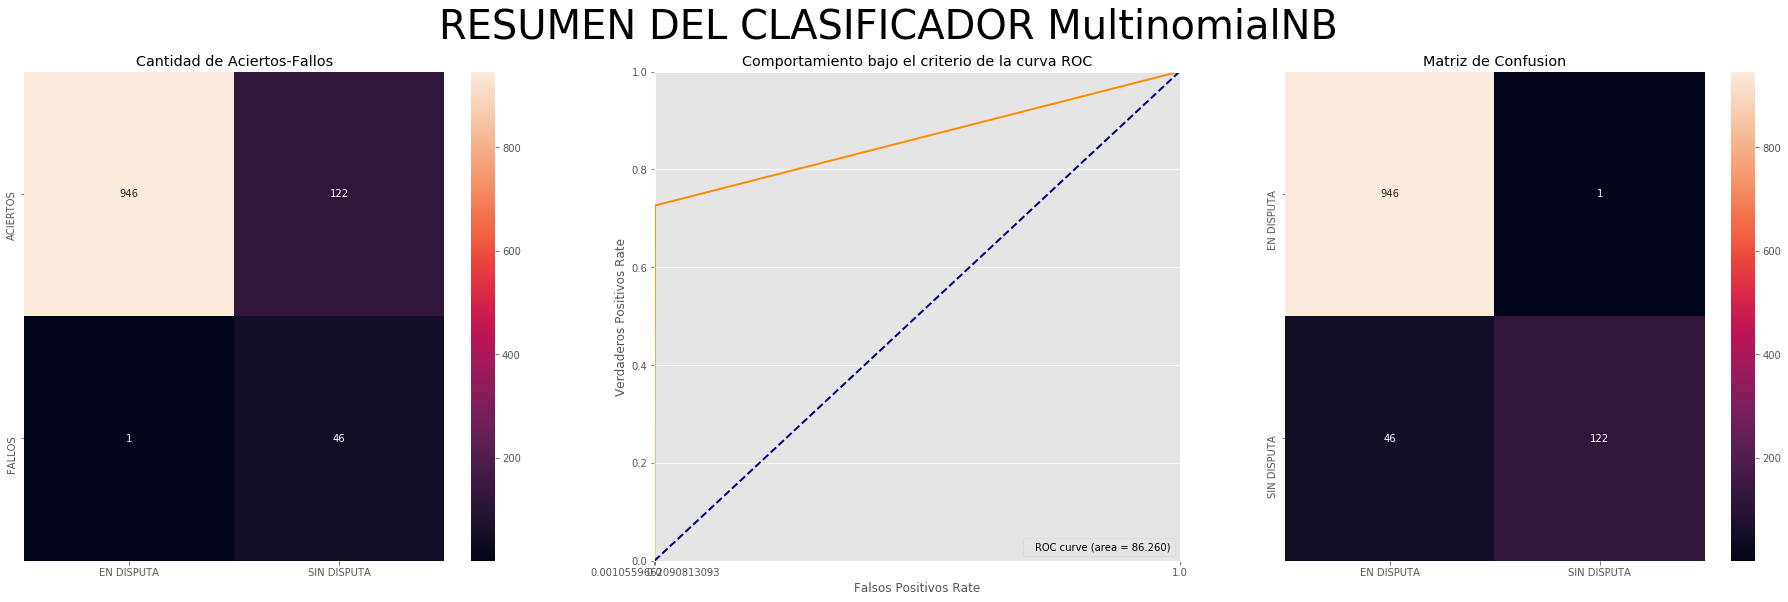

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  95.78 %
Precision:  99.19 %
Recall:  72.62 %
F1-Score:  83.85 %
Area Bajo la curva:  86.26 %
El promedio de Cross Validation para  10  validaciones es:  97.17 % con una variabilidad de +/-  0.86 %


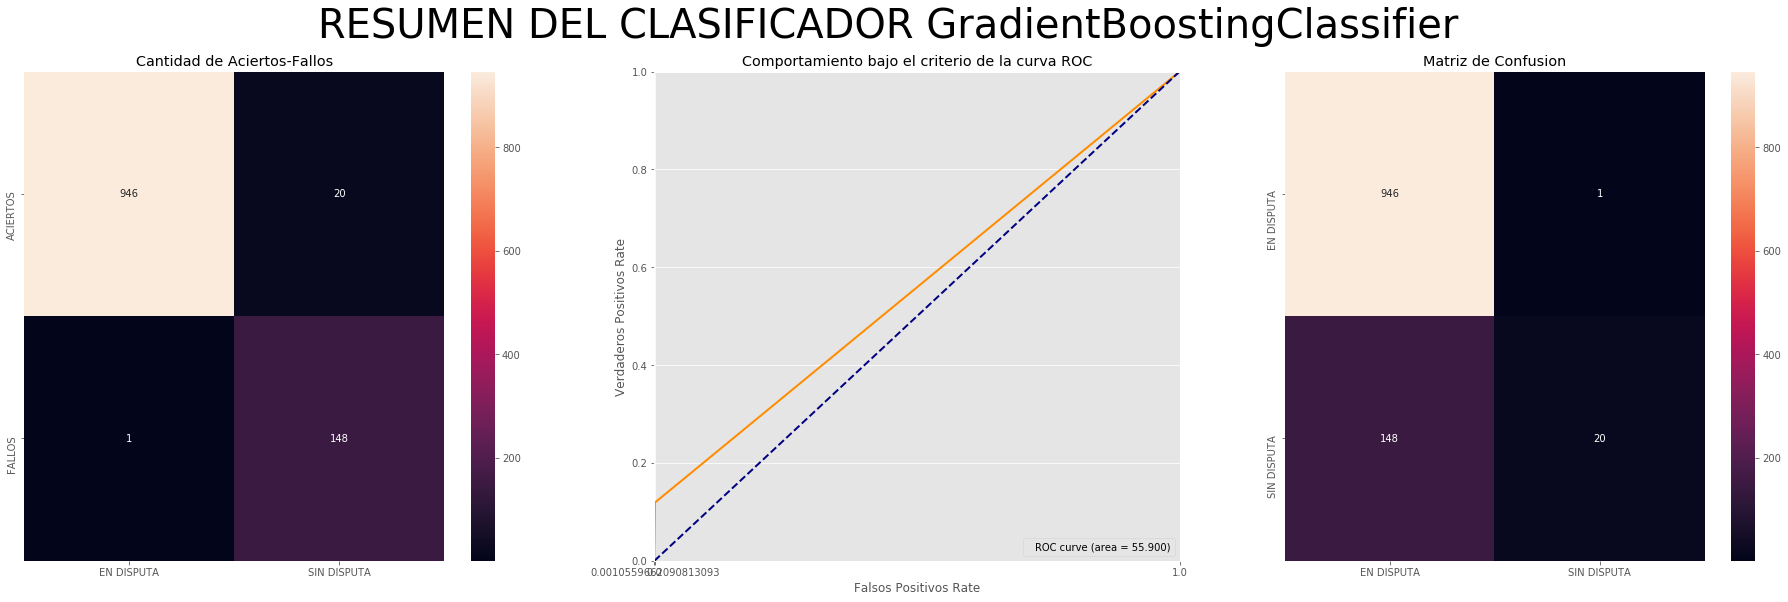

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  86.64 %
Precision:  95.24 %
Recall:  11.9 %
F1-Score:  21.16 %
Area Bajo la curva:  55.9 %
El promedio de Cross Validation para  10  validaciones es:  88.15 % con una variabilidad de +/-  0.51 %


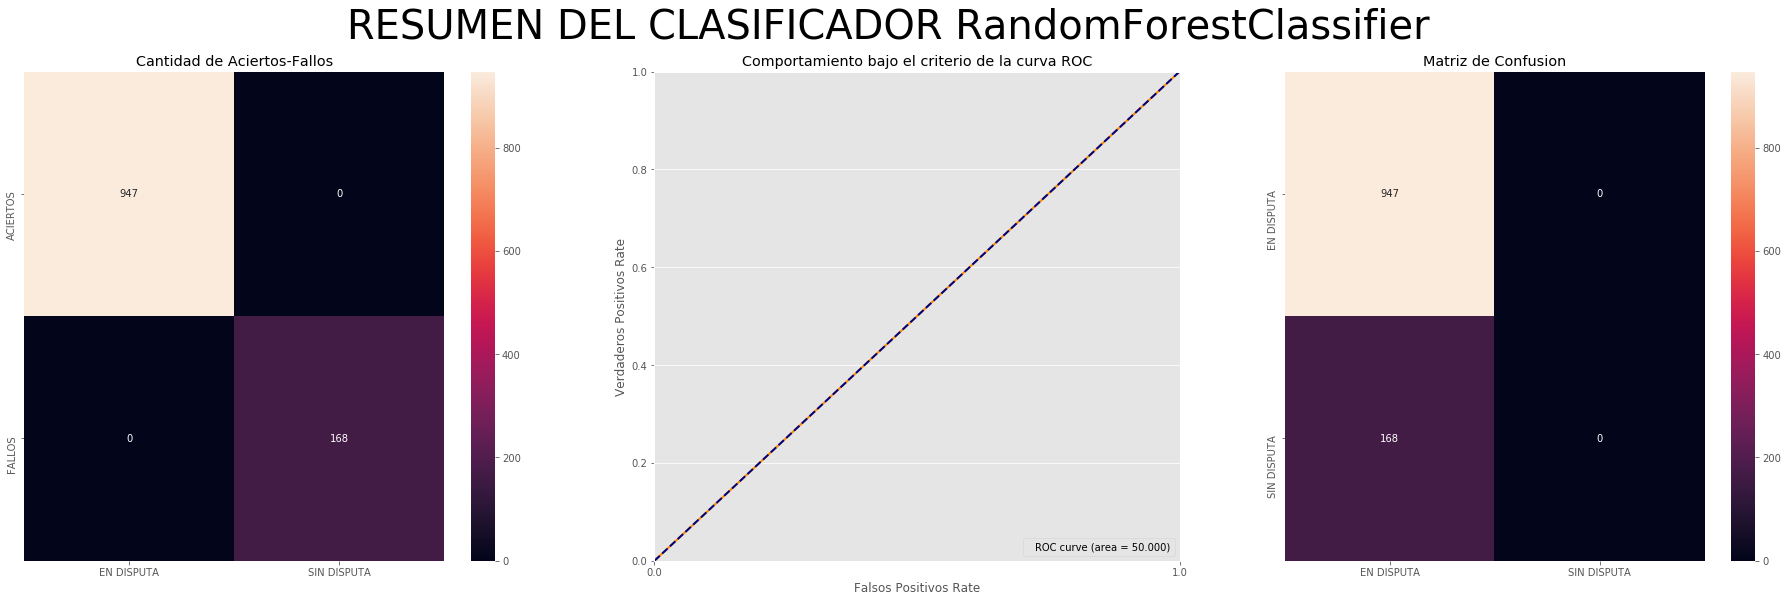

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  84.93 %
Precision:  0.0 %
Recall:  0.0 %
F1-Score:  0.0 %
Area Bajo la curva:  50.0 %
El promedio de Cross Validation para  10  validaciones es:  87.01 % con una variabilidad de +/-  0.05 %


C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1461209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


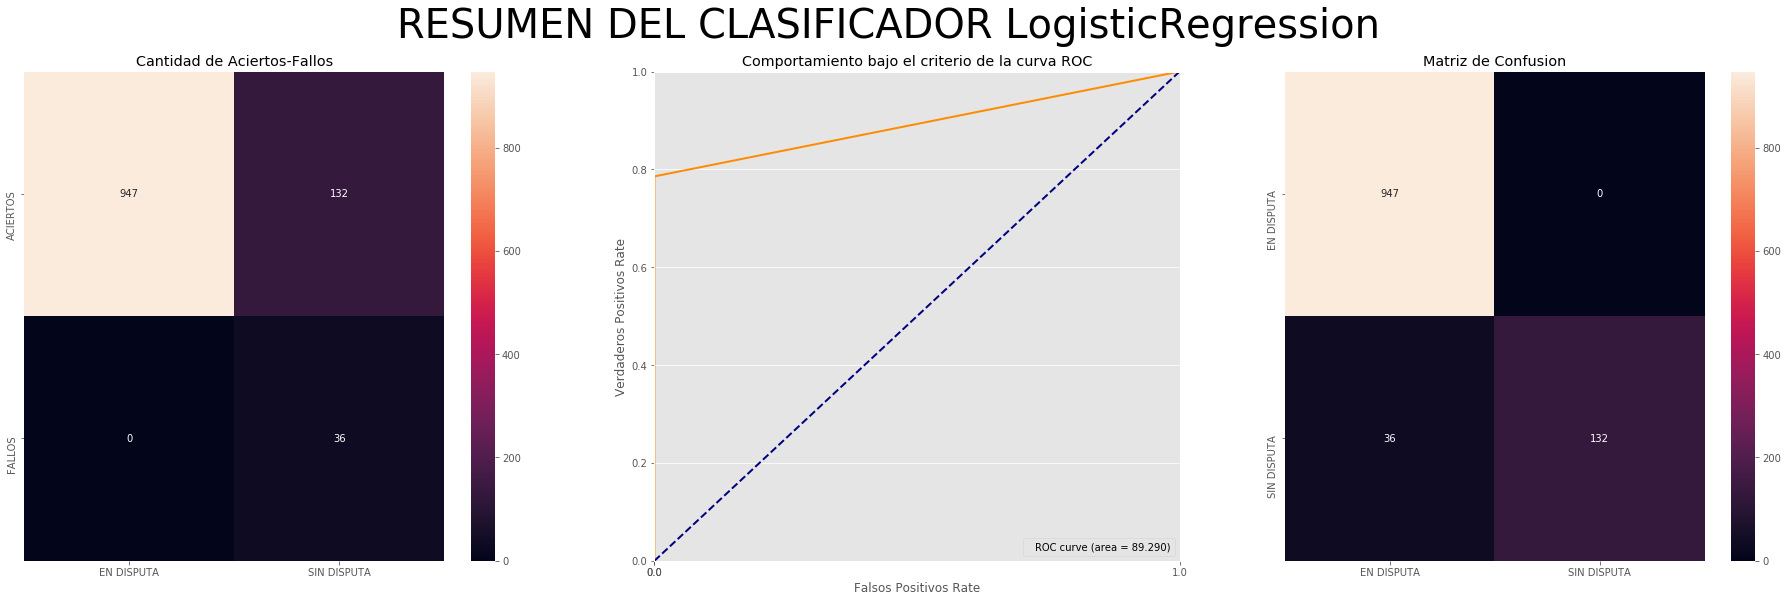

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

Accuracy:  96.77 %
Precision:  100.0 %
Recall:  78.57 %
F1-Score:  88.0 %
Area Bajo la curva:  89.29 %
El promedio de Cross Validation para  10  validaciones es:  96.32 % con una variabilidad de +/-  0.83 %


In [25]:
entrenamiento_modelo (x_trainTfid, x_testTfid, y_train, y_test)